In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 04 그래프 그리기



## 04-1 데이터 시각화가 필요한 이유

### 앤스콤 4분할 그래프
데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여줌


In [1]:
import seaborn as sns

In [5]:
anscombe = sns.load_dataset("anscombe")
print(anscombe.head(14))
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
<class 'pandas.core.frame.DataFrame'>


In [9]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

In [16]:
plt.plot(dataset_1['x'], dataset_1['y'])

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기

In [20]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

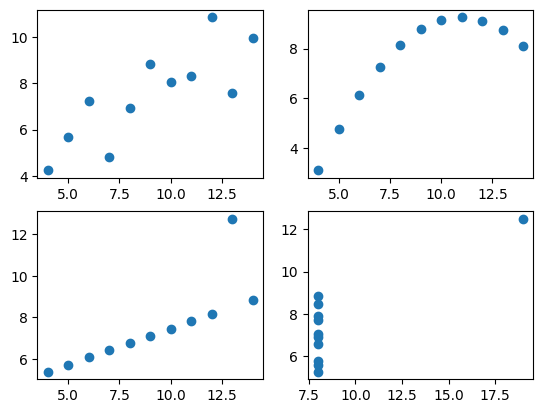

In [21]:
# 한 번에 4개의 그래프 그리기
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

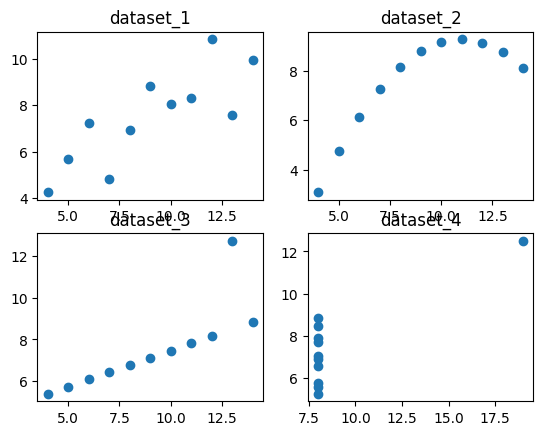

In [22]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

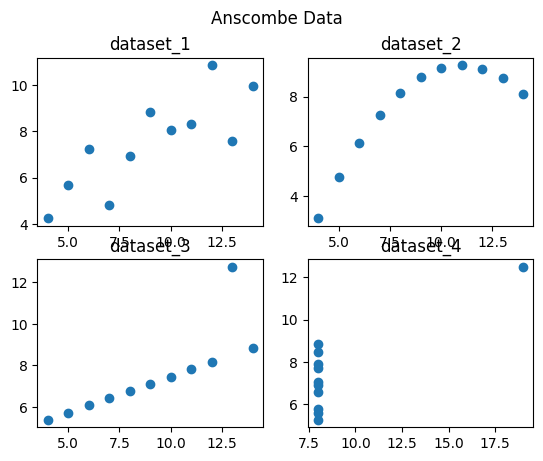

In [23]:
fig.suptitle("Anscombe Data")
fig

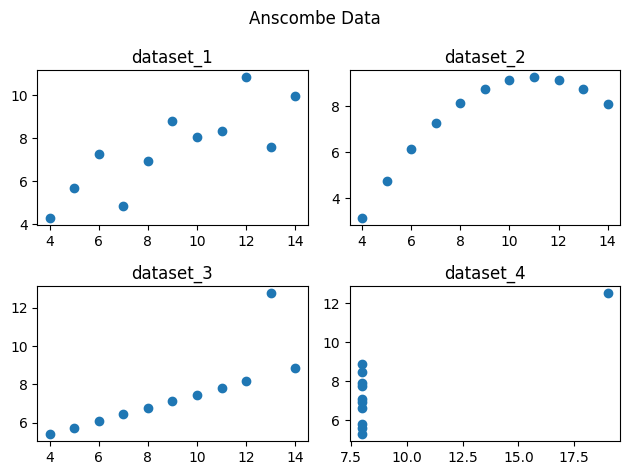

In [24]:
fig.tight_layout()
fig

## 04-2 matplotlib 라이브러리

### 기초 그래프
* histogram
* scatterplot
* box plot

In [18]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

<IPython.core.display.Javascript object>

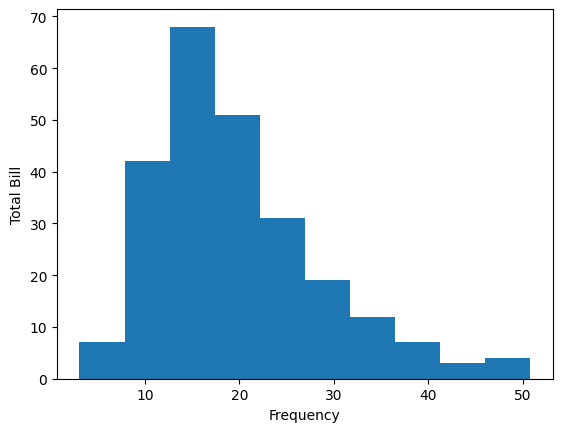

In [19]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10) # bins = x축 간격
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

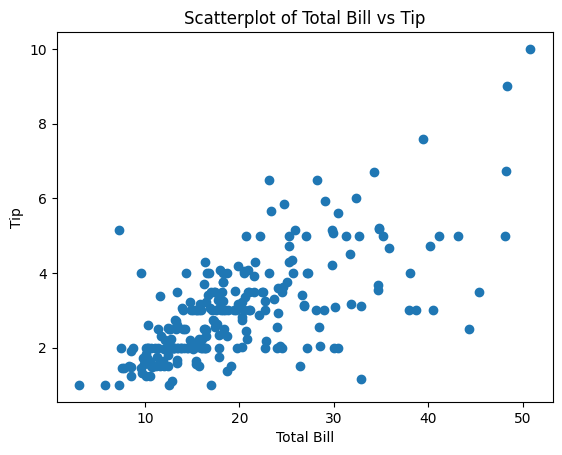

In [25]:
scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

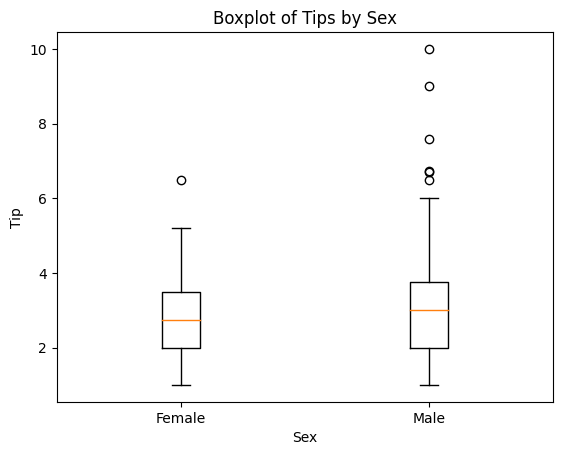

In [28]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels = ['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프

In [30]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

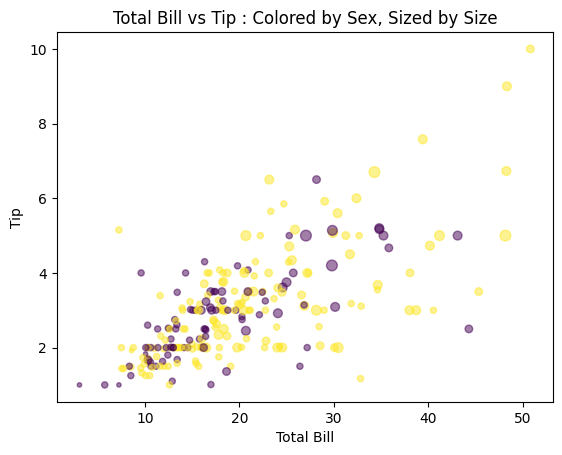

In [32]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size']*10,# 점 size
    c = tips['sex_color'], # 점 color
    alpha = 0.5 # 점의 투명도
)
axes1.set_title('Total Bill vs Tip : Colored by Sex, Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 04-3 seaborn 라이브러리

In [40]:
import seaborn as sns
tips = sns.load_dataset("tips")

<ipython-input-33-f0c35e122383>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Hisogram with Density Plot')

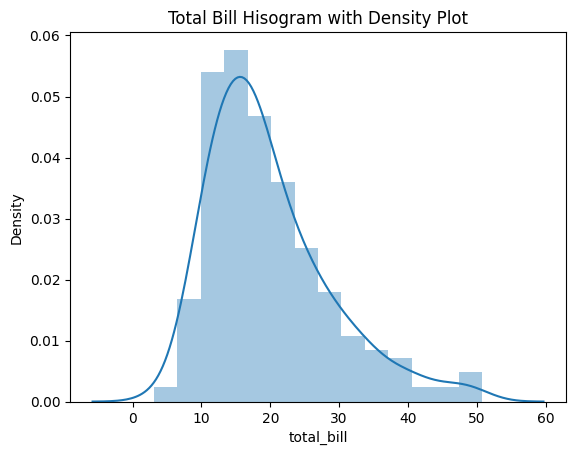

In [33]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Hisogram with Density Plot')

`distplot` 는 히스토그램과 밀집도 그래프를 같이 그림\
밀집도 그래프(kde)는 주어진 데이터를 정규화 시켜 넓이가 1이 되도록 그린 그래프\
디폴트:
* `hist = True`
* `kde = True`
* `rug = False`





<ipython-input-36-fdb32712df88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde=False) # kde = False: 밀집도 그래프 제외


Text(0, 0.5, 'Frequency')

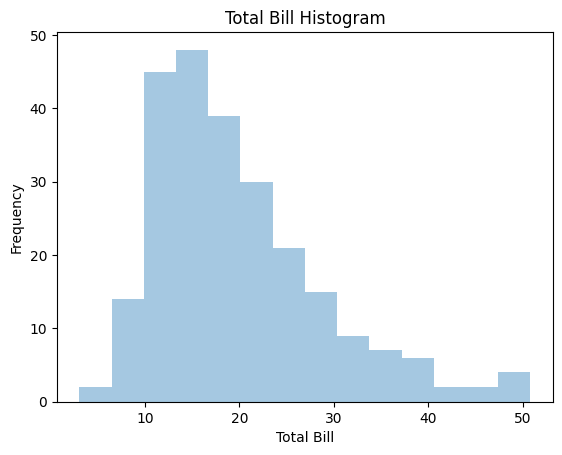

In [36]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False) # 밀집도 그래프 제외
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

<ipython-input-37-70823d546da1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], hist=False) # 히스토그램 제외


Text(0, 0.5, 'Unit Probability')

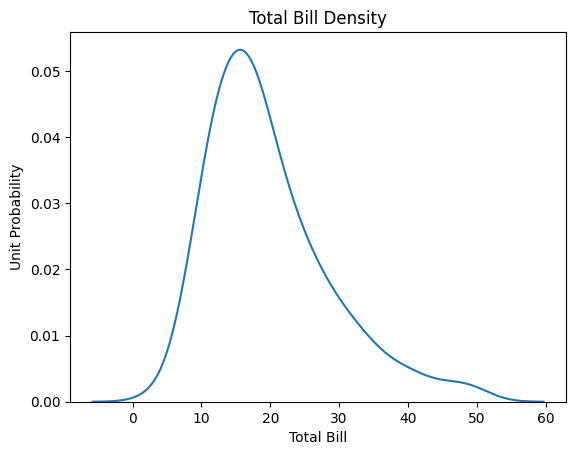

In [37]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False) # 히스토그램 제외
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

<ipython-input-38-43b9a2c830d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug = True)


Text(0.5, 0, 'Total Bill')

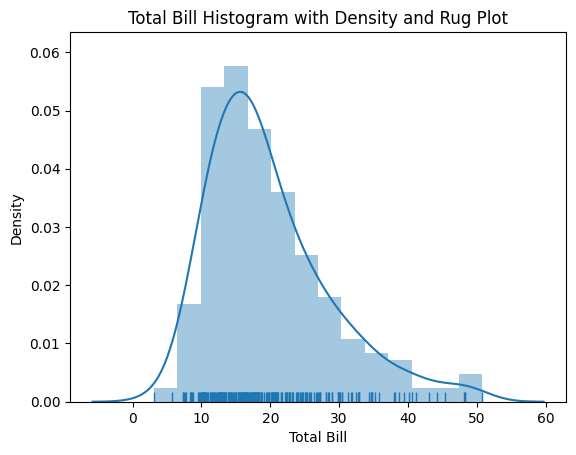

In [38]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

TypeError: ignored

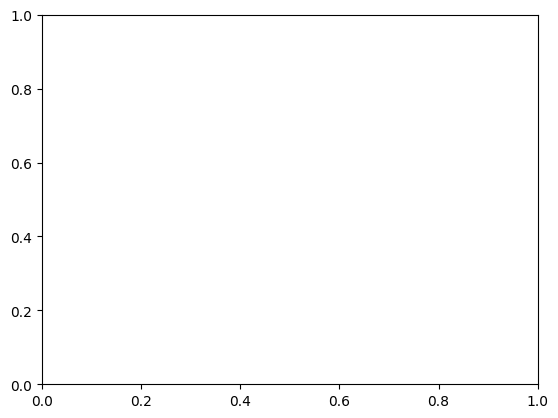

In [41]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### 다양한 종류의 이변량 그래프

#### 1. 산점도 그래프

Text(0, 0.5, 'Tip')

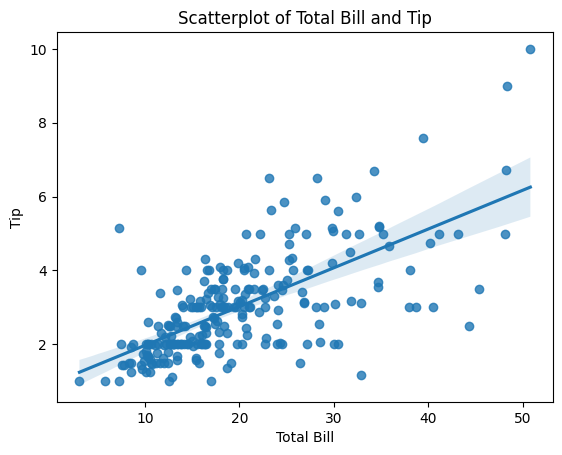

In [44]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

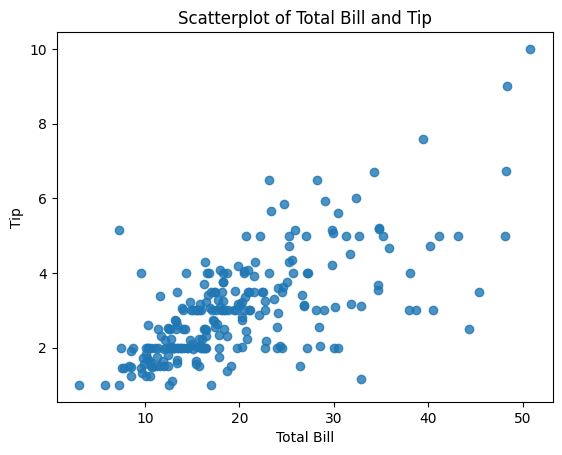

In [46]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 2. jointplot

Text(0.5, 1.03, 'Joint Plot of Total bill and Tip')

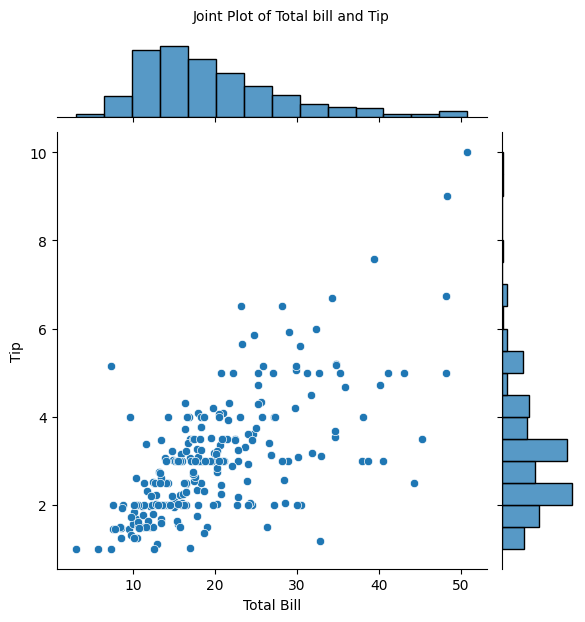

In [47]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total bill and Tip', fontsize=10, y=1.03)

#### 3. 육각그래프 kind = "hex"

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

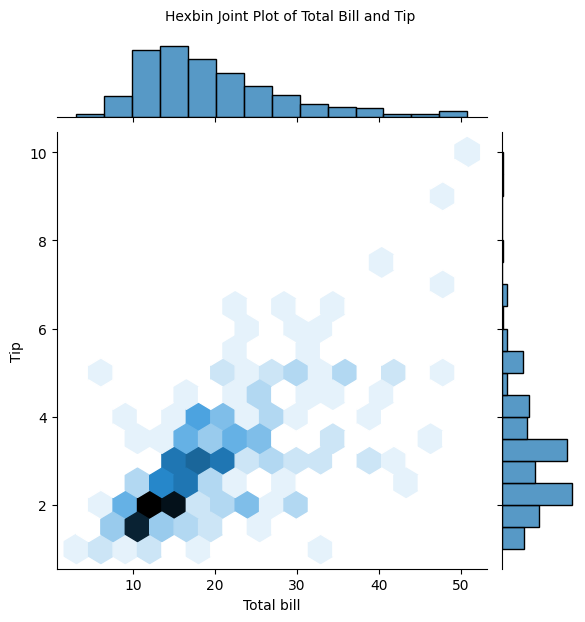

In [49]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")
hexbin.set_axis_labels(xlabel = 'Total bill', ylabel = 'Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 4. 이차원 밀집도 kdeplot

<ipython-input-59-595f5019131d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=tips,


Text(0, 0.5, 'Tip')

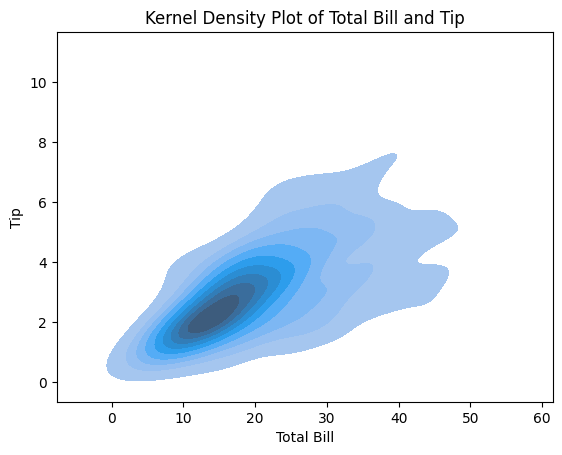

In [59]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips,
                 x="total_bill",
                 y="tip",
                 fill=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')


#### 5. barplot

Text(0, 0.5, 'Average total bill')

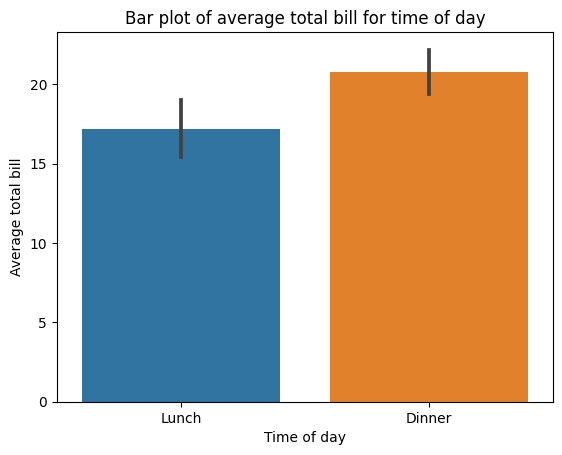

In [60]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### 6. boxplot

Text(0, 0.5, 'Total Bill')

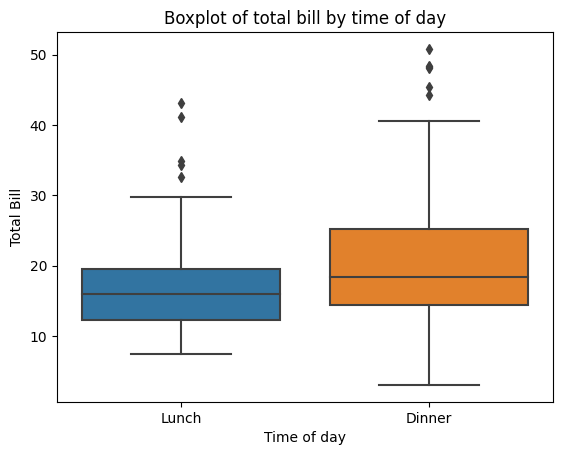

In [61]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 7. violinplot
boxplot에 kernel density를 추정한 형태

Text(0, 0.5, 'Total Bill')

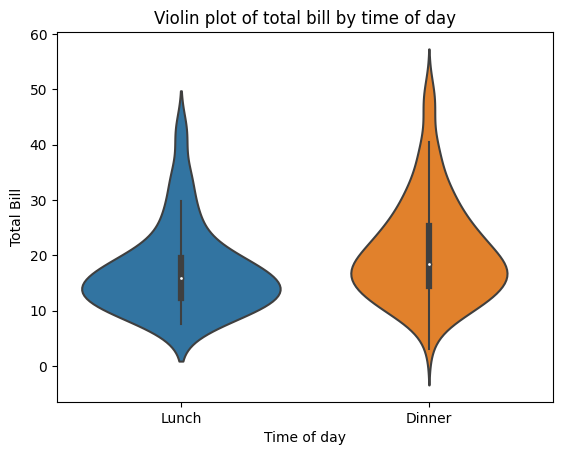

In [62]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 8. pairplot

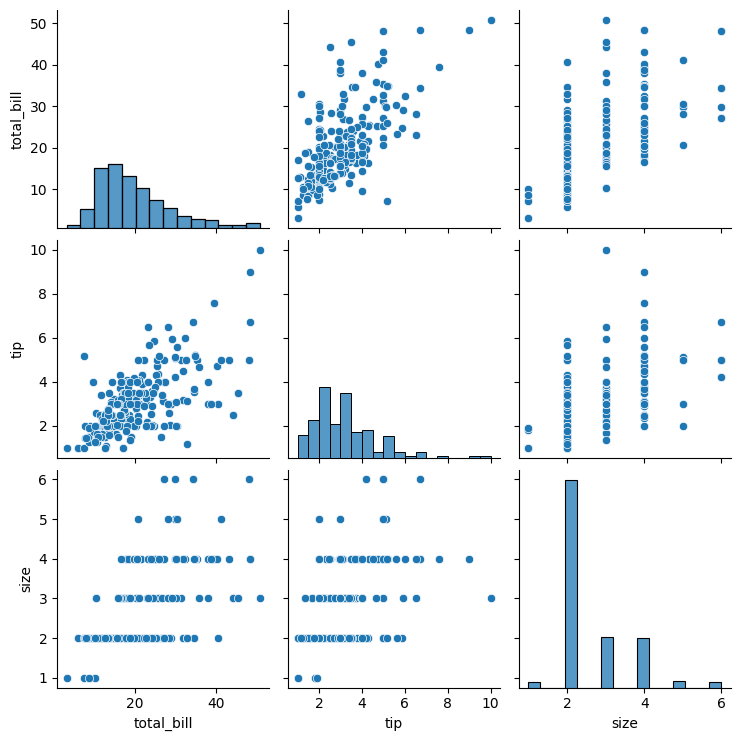

In [63]:
fig = sns.pairplot(tips)

#### 9. map_upper, map_lower, map_diag

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

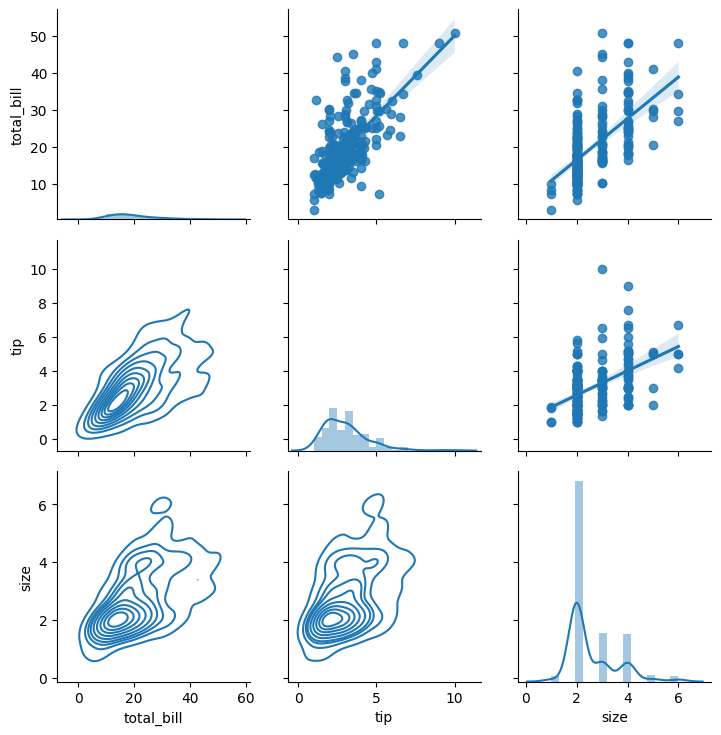

In [66]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 2차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot) # 히스토그램+밀집도
plt.show()

### 다변량 그래프 그리기

#### 1. violinplot

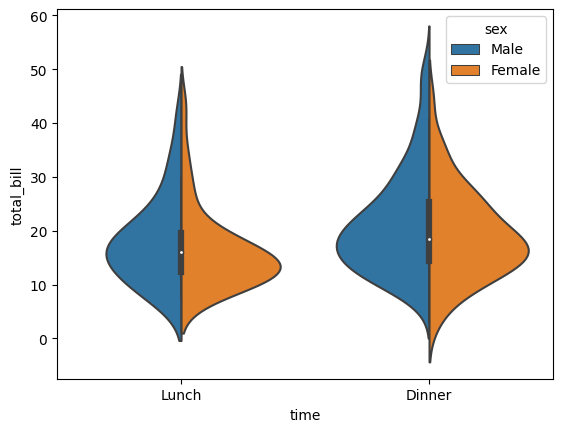

In [67]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',
                    hue='sex',
                    data=tips,
                    split=True)

#### 2. 산점도, 관계 그래프 - 색상 추가
hue = 'factor'

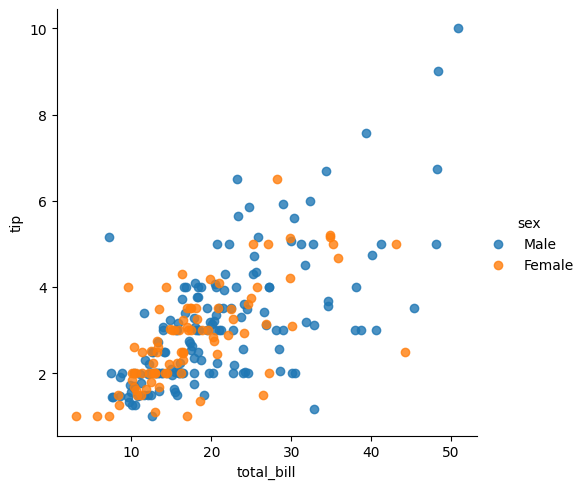

In [70]:
scatter = sns.lmplot(x='total_bill', y='tip',
                     data=tips,
                     hue = 'sex',
                     fit_reg=False)

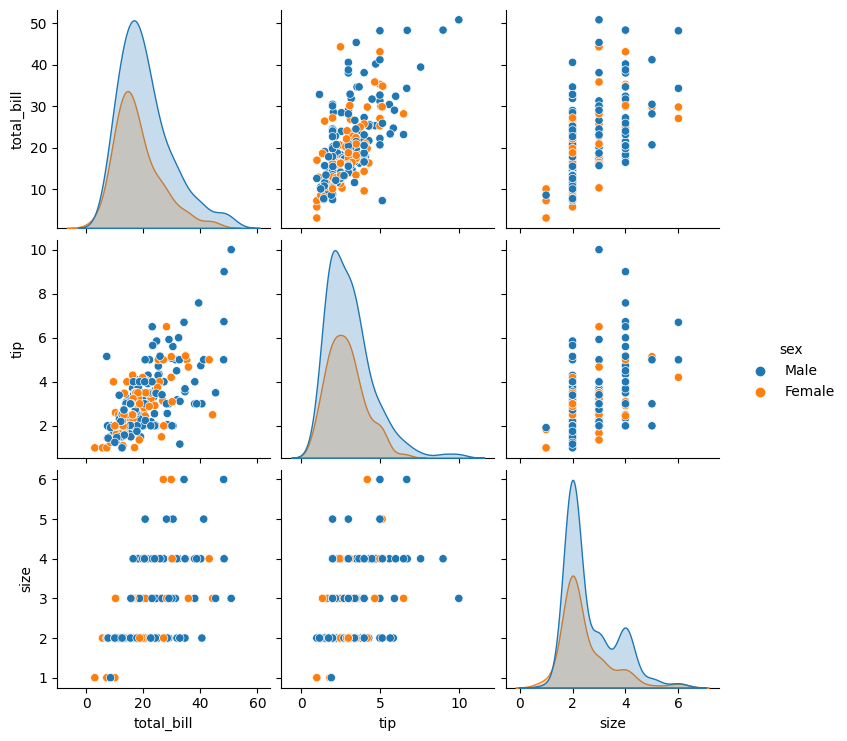

In [71]:
fig = sns.pairplot(tips, hue='sex')

#### 3. 산점도 그래프의 크기와 모양 조절: scatter_kws = 딕셔너리

ValueError: ignored

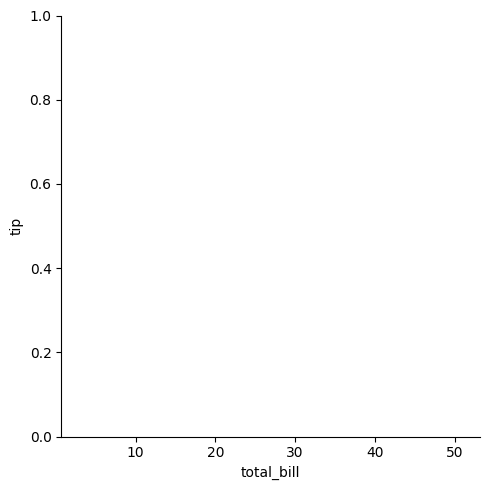

In [79]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip',
                     data = tips,
                     fit_reg = False,
                     hue = 'sex',
                     scatter_kws = {'s': tips['size']*10}
                     )

#### 4. 산점도의 점 다른 기호: markers

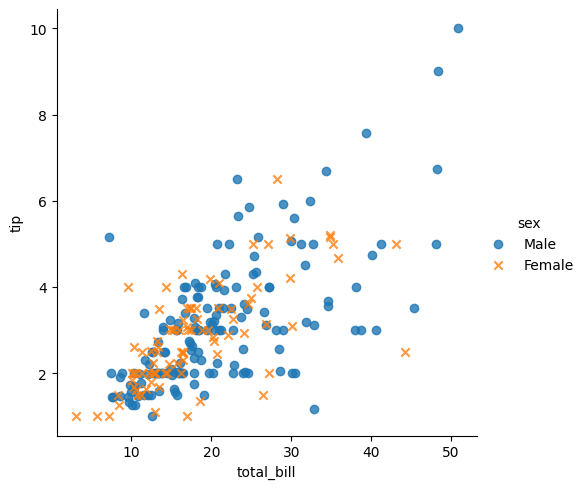

In [81]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip',
                     data = tips,
                     fit_reg = False,
                     hue = 'sex',
                     markers = ['o', 'x']
                     )

#### 5. lmplot 로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
`col` = 데이터 그룹을 구분할 열을 지정\
`col_wrap` = 그래프를 그릴 열의 최댓값

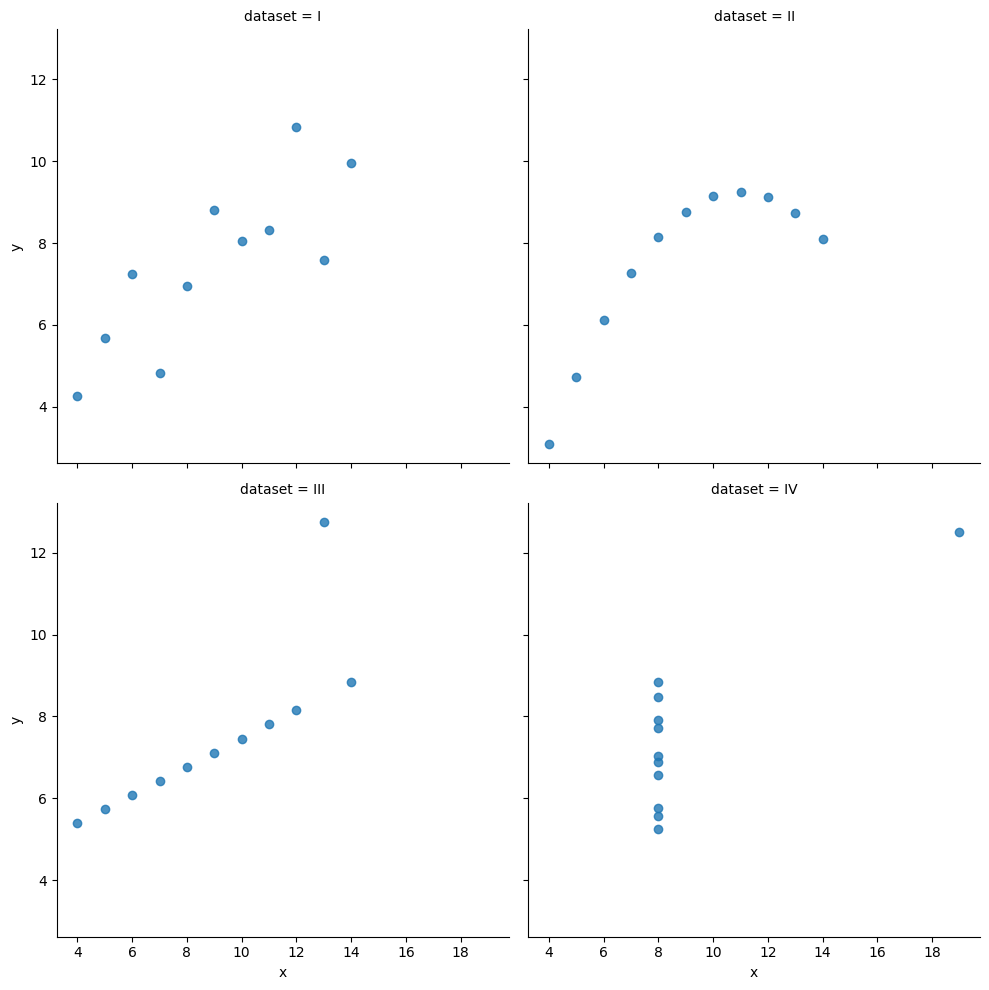

In [83]:
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2)

#### 6. FacetGrid 로도 그룹별 그래프를 그릴 수 있음

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


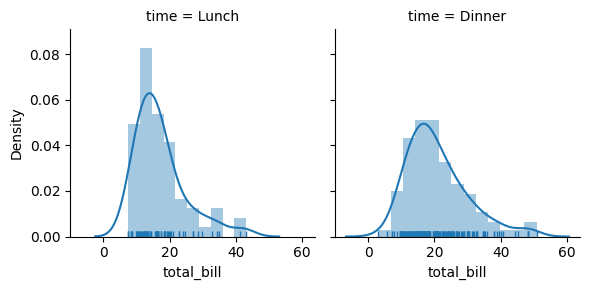

In [84]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

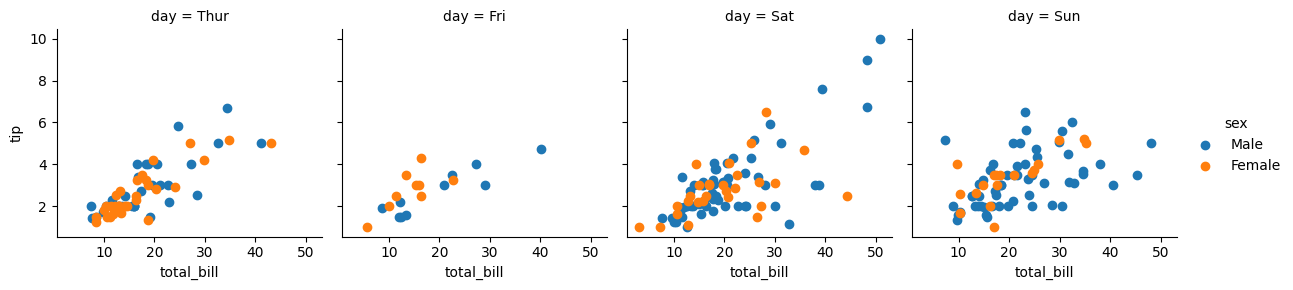

In [86]:
facet = sns.FacetGrid(tips, col = 'day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

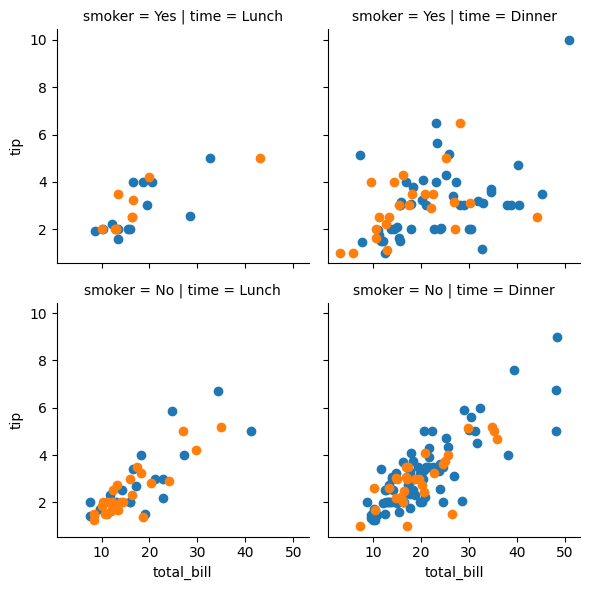

In [87]:
# time은 column 별로, smoker는 row 별로
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill','tip')

## 04-4 데이터프레임과 시리즈로 그래프 그리기
시리즈에 있는 `plot` 속성 속
* `hist` (`alpha`, `bins`)
* `kde`
* `scatter`
* `hexbin` (`gridsize`)


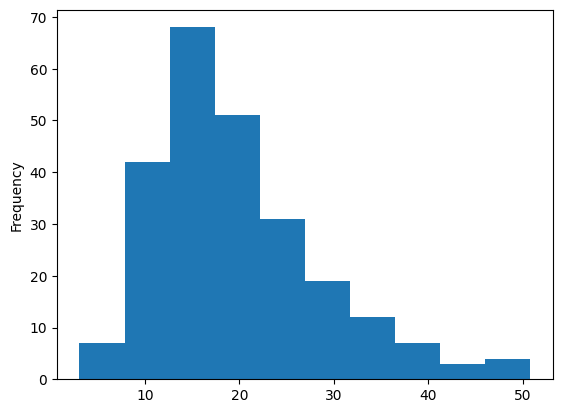

In [88]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

* `alpha`: 투명도
* `bins`: x축 간격

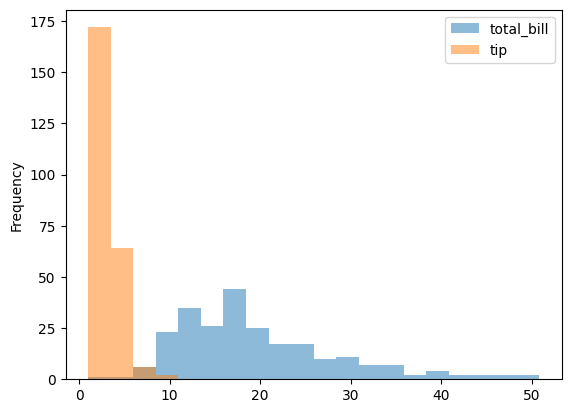

In [89]:
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

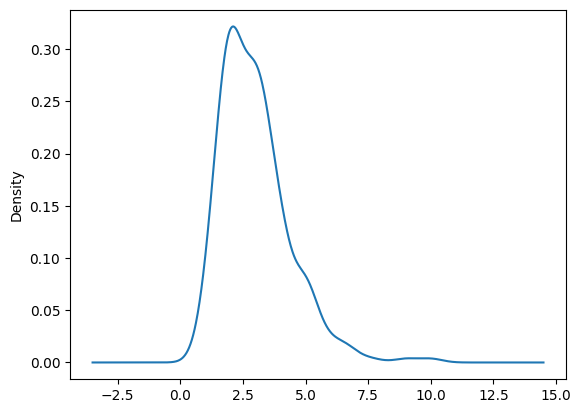

In [90]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

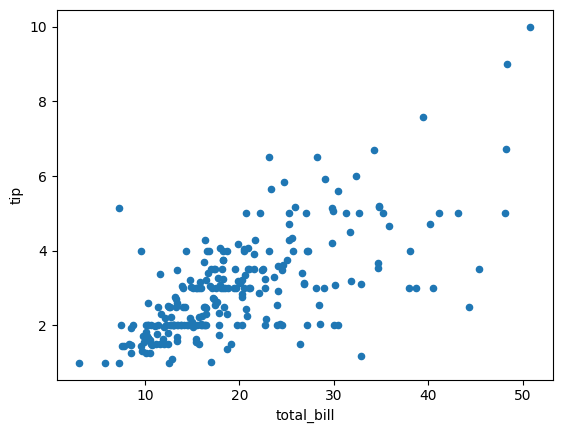

In [91]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

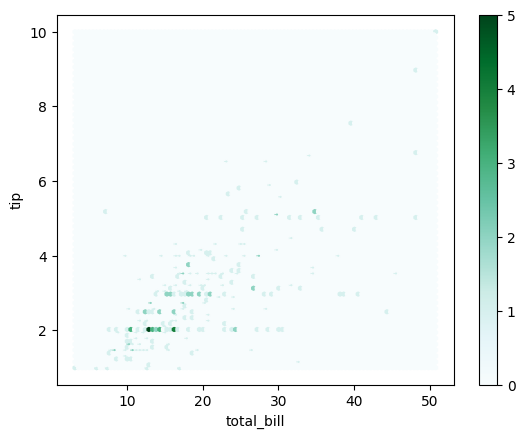

In [92]:
fig, ax=plt.subplots()
ax=tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

hexbin의 육각형 크기: `gridsize` 인자

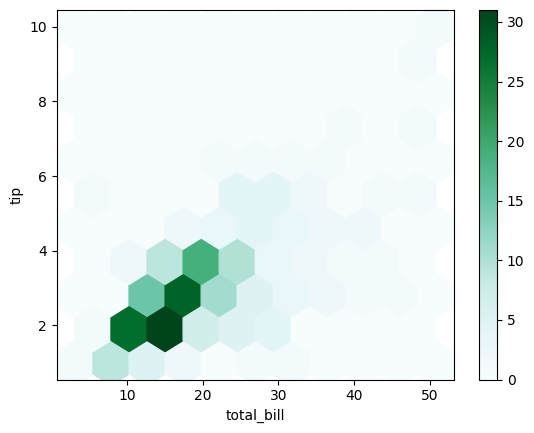

In [93]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

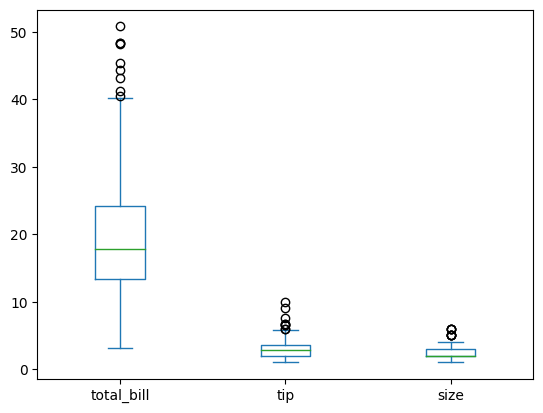

In [94]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

## 04-5 seaborn 라이브러리로 그래프 스타일 설정하기
`set_style`\
seaborn 라이브러리 스타일 5가지: darkgrid, whitegrid, dark, white, ticks

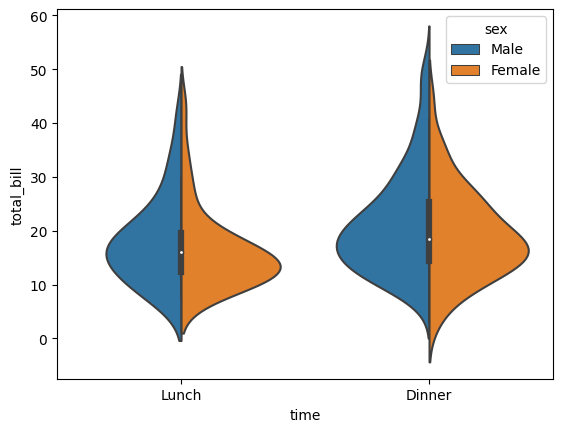

In [95]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

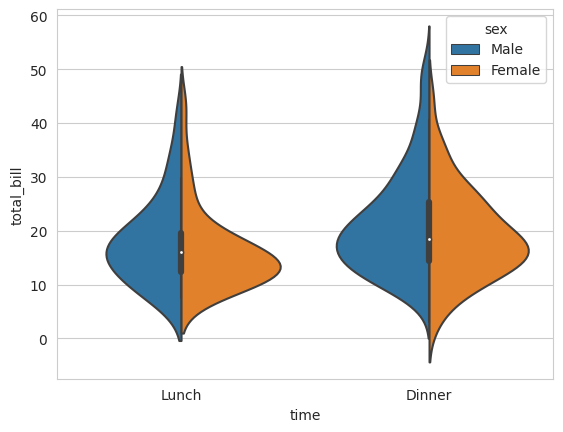

In [96]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

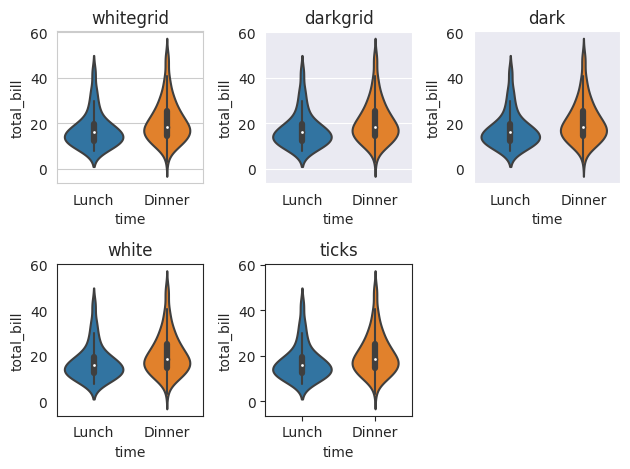

In [97]:
# for 문을 이용하여 all five styles

fig = plt.figure()
seaborn_styles = ['whitegrid', 'darkgrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2,3,plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)

fig.tight_layout()